In [1]:
import numpy as np
import pandas as pd

# Section 11: Regex and Text Manipulation

Python and Pandas have a lot to offer in terms of extracting information from text and manipulation text. In this section we will cover#
* a detailed overview of Python string methods
* the Pandas `.str` family of methods
* advanced splits and replacements in Pandas
* hands-on introduction of RegEx
  * character sets, anchors, metasequences, quantifiers and more!

We'll get some hands-on practice on this using a Boston marathon dataset

## Our data: Boston Marathon Runners


For this section we'll be working with a dataset for Boston marathon participants.

https://andybek.com/pandas-marathon

In [2]:
boston_url = 'https://andybek.com/pandas-marathon'

In [3]:
boston = pd.read_csv(boston_url)

In [4]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


In [5]:
boston.info

<bound method DataFrame.info of                     Name  Age M/F  ... Overall Gender  Years Ran
0       Kirui, Geoffrey    24   M  ...       1      1        NaN
1         Rupp, Galen      30   M  ...       2      2        NaN
2        Osako, Suguru     25   M  ...       3      3        NaN
3       Biwott, Shadrack   32   M  ...       4      4        NaN
4         Chebet, Wilson   31   M  ...       5      5       2015
..                   ...  ...  ..  ...     ...    ...        ...
995         Larosa, Mark   38   M  ...     996    940  2015:2016
996  Williamson, Jerry A   43   M  ...     997    941       2015
997      Mccue, Daniel T   40   M  ...     998    942        NaN
998         Larosa, John   35   M  ...     999    943        NaN
999       Sanchez, Sam R   35   M  ...    1000    944        NaN

[1000 rows x 10 columns]>

We hvae a dataset of 10 columns that include the Name, Age, and gender of eahc runner for the year 2017. Most of the fields are strings, including the "Official Time" which is text-based. This gives us plent of text data to play around with in this section.

## String Methods in Python

We'll start by playing around with pure text in Python. We will cover the following concepts:
* `len`
* `center`
* `startswith` and `endswith`
* the `in` operator
* list comprehension with strings

Link to common python string operations: https://docs.python.org/3/library/string.html

Let's begin with a text string.

In [6]:
s = "Welcome to the text manipulation section"

We can get the length of the string (number of characters)

In [7]:
len(s)

40

The `center()` method creates a longer string that has the current string at the center and adds to both sides characters that we specify. The first value passed in to the function indicates the length of the final string, and the second value specifies that character(s) to be added to each side of the starting string to get the final string.

In [8]:
s.center(100, '*')

'******************************Welcome to the text manipulation section******************************'

Note that if your starting string is longer than the string you are attempting to build, you'll simply get the starting string back.

In [9]:
s.center(30, '*')

'Welcome to the text manipulation section'

We can also check whether the string starts or ends with a given character or characters using `startswith()` and `endswith()`. 
* Note that these methods are case-sensitive.

In [10]:
s.endswith('tion')

True

In [11]:
s.startswith("Wel")

True

To confirm that the string contains the given character or substring, Python does NOT have a dedicated "contains" or "includes" method. Instead, we check for inclusion using the `in` operator.

In [12]:
'text manipulation' in s

True

In [13]:
'texted' in s

False

When analyzing datasets that contain text, we don't usually operate on individual strings. Instead, we take an operation and apply it to the entire collection of strings.

One way to do this in Python is to apply text transforms within list comprehensions.

In [14]:
names = ['Alanah', 'Albion', 'Andrew', 'Brian']

Suppose we want to find the lengths of all of the strings in this list. We could do this with list comprehension

In [15]:
[len(name) for name in names]

[6, 6, 6, 5]

Similarly, we can call any function we want, including functions we define. For instance, we can check whether the names start with "A".

In [16]:
[name.startswith('A') for name in names]

[True, True, True, False]

This approach is okay-looking, but it's actually quite fragile. For example if we had an invalid string or a missing value (which happens all of the time in real-world data), Python will thrown an error. 

Example:

In [17]:
names = ['Alanah', 'Albion', 'Andrew', np.NaN, 'Brian']

In [18]:
## Results in TypeError: object of type 'float' has no len()
# [len(name) for name in names]

So we need some special logic to accommodate issues such as these. This is one aspect where Numpy and Pandas improve on the built-in Python capabilities. Pandas allows us to conduct large-scale text manipulation without having to worry about missing values.

## Vectorized String Operations in Pandas

Pandas offers an extensive toolset for vectorized string operations on large sequences of text values. Many of the methods we discussed still apply, but the way we access them is a bit difference.

In [19]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


Suppose we want to find the name of each runner's name. Let's do it in Python first.

In [20]:
len('Kirui, Geoffrey')

15

But if we get a hold of the entire name range as a Series and pass it to the `len()` function, we'll quickly see that it doesn't work. Instead, we simply get a single number indicating the number of values in the "Name" column.

In [21]:
len(boston.Name)

1000

To get a series of lengths of names, we can use the `.str` family of methods. The `.str` is a common attribute that allows us to access vectorized string operations in Pandas. We can use it to, for example, perform vectorized calculations on the length of each name in the "Name" columns.

In [22]:
boston.Name.str.len()

0      17
1      14
2      15
3      16
4      14
       ..
995    12
996    19
997    15
998    12
999    14
Name: Name, Length: 1000, dtype: int64

The same goes for other functions.

In [23]:
boston.Name.str.startswith('A')

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Name, Length: 1000, dtype: bool

For the most part, vectorized string methods in Pandas follow the same naming convention as built-in string methods. We'll see some exceptions later, but for the most part they are the same methods that we see in Python. The only difference is that they operate on the entire sequence at once and they exclude any missing values.
* https://docs.python.org/3/library/stdtypes.html#string-methods

## Case Operations

There exist a family of methods that impact casing of text data. 
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.upper.html
* The page above also contains links to other string methods.

For these examples let's focus on the "City" column

In [24]:
boston.City

0           Keringet
1           Portland
2       Machida-City
3      Mammoth Lakes
4           Marakwet
           ...      
995    North Andover
996          Raleigh
997        Arlington
998          Danbury
999         Santa Fe
Name: City, Length: 1000, dtype: object

The casing we see here is known as "title case", where the first letter of each word is capitalized. In both Python and Pandas it is applied using the `.title()` method.

In [25]:
boston.City.str.title()

0           Keringet
1           Portland
2       Machida-City
3      Mammoth Lakes
4           Marakwet
           ...      
995    North Andover
996          Raleigh
997        Arlington
998          Danbury
999         Santa Fe
Name: City, Length: 1000, dtype: object

This series was already title-cased, so the result is not particularly interesting (there was no change). So let's try another case operation. 

We can convert everything to upper case using the `.upper()` method.

In [26]:
boston.City.str.upper()

0           KERINGET
1           PORTLAND
2       MACHIDA-CITY
3      MAMMOTH LAKES
4           MARAKWET
           ...      
995    NORTH ANDOVER
996          RALEIGH
997        ARLINGTON
998          DANBURY
999         SANTA FE
Name: City, Length: 1000, dtype: object

A few other case methods include
* `lower()`
* `swapcase()` - reverses the current casing; upper becomes lower and lower becomes upper (instructor hasn't really found a great use for this method)
* `capitalize()` - capitalize the first letter of the *string* only (NOT the first letter of every word). All other letters are lower case

In [27]:
boston.City.str.lower()

0           keringet
1           portland
2       machida-city
3      mammoth lakes
4           marakwet
           ...      
995    north andover
996          raleigh
997        arlington
998          danbury
999         santa fe
Name: City, Length: 1000, dtype: object

In [28]:
boston.City.str.swapcase()

0           kERINGET
1           pORTLAND
2       mACHIDA-cITY
3      mAMMOTH lAKES
4           mARAKWET
           ...      
995    nORTH aNDOVER
996          rALEIGH
997        aRLINGTON
998          dANBURY
999         sANTA fE
Name: City, Length: 1000, dtype: object

In [29]:
boston.City.str.capitalize()

0           Keringet
1           Portland
2       Machida-city
3      Mammoth lakes
4           Marakwet
           ...      
995    North andover
996          Raleigh
997        Arlington
998          Danbury
999         Santa fe
Name: City, Length: 1000, dtype: object

## Finding Characters and Words: `str.find()` and `str.rfind()`

We'll begin with a review of the Python `find()` and `rfind()` function. Recall our simply string `s`

In [30]:
s

'Welcome to the text manipulation section'

Suppose we want to identify the exact position of the first lower-case "x" character in this string. To do this, we call the `find()` method on the string we are looking for and provide the search character.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.find.html

In [31]:
s.find('x')

17

We see that the first lower-case "x" is at index position 17 (the 18th letter of the string since Python is zero-indexed).

In [32]:
s[17]

'x'

We can search for any sequence of characters that we want. For instance, let's look for a full substring "text". What returns is the position of the first character in that substring

In [33]:
s.find('text')

15

If you ever provide a search string that does not exist in the queried string, the `find()` method will return -1.

Returning now to Pandas, let's list the first few records to orient ourselves.

In [34]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


Here we'll pick the "Name" column and explore the number of top marathon runners have 'Andy' in their names. This can be easily achieved by applying the `find()` method to the entire sequence of names. Per usual, we will use the `.str` accessor and then apply the `find()` method.

In [35]:
boston.Name.str.find('Andy')

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
995   -1
996   -1
997   -1
998   -1
999   -1
Name: Name, Length: 1000, dtype: int64

What returns is a long sequence of integers, indicating the place in each name in which the substring "Andy" is located. Let's do a quick `value_counts()` analysis.

In [36]:
boston.Name.str.find('Andy').value_counts()

-1     998
 12      1
 8       1
Name: Name, dtype: int64

There are actually two instances of someone having "Andy" in their name. Seems underrepresented. How about a name like "James?"

In [37]:
boston.Name.str.find('James').value_counts()

-1     988
 10      3
 8       3
 9       2
 7       2
 12      1
 6       1
Name: Name, dtype: int64

The `find()` method performs a left-to-right search by default. If we start from the right instead, we'll get a different position integer returned. Let's illustrate this directionality with a new string.

In [38]:
p = 'pandas numpy numpy pandas'

Let's first try searching for "pandas"

In [39]:
p.find('pandas')

0

We get zero, indicating that the first "pandas" substring instance begins at the 0th indexed position, as we expected. What if we want to start counting from the right side and determine that position in which "pandas" appears closest to the right? We do that using the `rfind()` method.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.rfind.html

In [40]:
p.rfind('pandas')

19

Here the method indicated that, starting from the right side of the string, the first "pandas" occurrence is at position 19. We can verify this with a slice.

In [41]:
p[19:]

'pandas'

## Strips and Whitespace Methods

**Whitespace** refers to characters that represent vertical or horizontal space, such as tab and newline characters. They are oftentimes not visible when a stirng is printed, but they do impact the spacing and positioning of the output.

In this lecture we'll cover the following methods:
* `isspace()`
* `lstrip()`
* `rstrip()`
* `strip()`

Descriptions of these methods can be find here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html

To check whether a given character is a whitespace, we can use the Python method `isspace()`

In [42]:
' '.isspace()

True

In [43]:
'\n'.isspace()

True

Let's contain some sample strings that contain whitespace to work with for the rest of the section.

In [44]:
left_spaced = '     this is a pandas course'

In [45]:
right_spaced = 'we cover plenty of Python too!      '

In [46]:
spaced = '    the name is: BOND \t JAMES BOND \n\n'

When printing the left_spaced string, the leading space will not be immediately obvious.

In [47]:
print(left_spaced)

     this is a pandas course


It's tough to see, but it's there and the whitespace contributes to the length of the overall string.

In [48]:
print(spaced)

    the name is: BOND 	 JAMES BOND 




Whitespace can be troublesome when working with text, which happens when gathering text from unstructured input, such as forums, comments, etc.

Luckily, Python and Pandas offer a number of very useful methods to string whitespace from text. First up is `lstrip()`, which removes leading whitespace.

In [49]:
left_spaced.lstrip()

'this is a pandas course'

`rstrip()` does the exact same thing, but on the right-hand side.

In [50]:
right_spaced.rstrip()

'we cover plenty of Python too!'

The generic `strip()` method does the same thing but on both ends at the same time.

In [51]:
spaced.strip()

'the name is: BOND \t JAMES BOND'

Notice that the horizonatal tab character "\t" is still there. Unfortunately there's no method that handles this character specifically. However, we'll hand this with replacement later on when we combine the replacement methods with regular expressions.

Moving on to Pandas, let's again look at our dataframe

In [52]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


Looking at our "Name" column, we see that some names have leading or trailing whitespace, for example the first two names on the list.

In [53]:
boston.Name.iloc[0]

' Kirui, Geoffrey '

In [54]:
boston.Name.iloc[1]

'Rupp, Galen   '

How do we apply the vectorized `strip()` method to this? It's the same syntax that we're familiar with.

In [55]:
boston.Name.iloc[0:2].str.strip()

0    Kirui, Geoffrey
1        Rupp, Galen
Name: Name, dtype: object

This has stripped all leading and trailing white space from the first two names. Let's go ahead and apply this to our entire sequence of names, and then assign the result back to the "Name" column.

In [56]:
boston.Name = boston.Name.str.strip()

In [57]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


Hard to tell if that did anything, let's verify that it worked by looking at the first name again. 

In [58]:
boston.Name.iloc[0]

'Kirui, Geoffrey'

Sure enough, the leading whitespace is gone!

## String Splitting and Concatenation: `split()`, `get()`, and `cat()`

Splitting methods take a piece of text and break it down into smaller strings based on a break point that we specify.

Recall our string from a few lectures ago, which we will call `split()` on.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html

By default (when called without arguments), the method splits the string on **whitespace** and creates a list of strings consisting of the component "words" of the original string.
* Oftentimes this means splitting on single spaces, but any whitespace will be considered a split point by the method.

In [59]:
s

'Welcome to the text manipulation section'

In [60]:
s.split()

['Welcome', 'to', 'the', 'text', 'manipulation', 'section']

Consider the James Bond string from earlier. First we will attempt to split on any whitespace.

In [61]:
spaced

'    the name is: BOND \t JAMES BOND \n\n'

In [62]:
spaced.split()

['the', 'name', 'is:', 'BOND', 'JAMES', 'BOND']

WHat if we try to split specifically by a single space?

In [63]:
spaced.split(' ')

['', '', '', '', 'the', 'name', 'is:', 'BOND', '\t', 'JAMES', 'BOND', '\n\n']

It is also worth mentioning that we can split a string on anything we want. For instance, we can split or `s` string on "to"

In [64]:
s.split('to')

['Welcome ', ' the text manipulation section']

One last important note, as observed above, is that the string that is chosen as the split point is not included in the returned collection; it is always discarded.

Now let's bring this over to Pandas and our dataframe.

In [65]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


Suppose we need to introduce two new columns to our dataframe, one with runners' first names and another with runners' last names. Notice how every runner is identified by their last name, comma, space, first name. Thus, a good condidate for the split string is ", ". 

Let's try it.

In [66]:
boston.Name.str.split(', ')

0          [Kirui, Geoffrey]
1              [Rupp, Galen]
2            [Osako, Suguru]
3         [Biwott, Shadrack]
4           [Chebet, Wilson]
               ...          
995           [Larosa, Mark]
996    [Williamson, Jerry A]
997        [Mccue, Daniel T]
998           [Larosa, John]
999         [Sanchez, Sam R]
Name: Name, Length: 1000, dtype: object

This returns a pandas series of Python lists - each runner's name was split on the ", " and returned a list of the two component names.

Now we need to get these first and last names in their own respective columns. How do we extract the first item for each of our records?

One way to it is to chain on a special Pandas string method called `str.get()`, which is designed precisely for instances like this. Simply put. it extracts an element from each component at the specified location.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.get.html



In [67]:
boston.Name.str.split(', ').str.get(0)

0           Kirui
1            Rupp
2           Osako
3          Biwott
4          Chebet
          ...    
995        Larosa
996    Williamson
997         Mccue
998        Larosa
999       Sanchez
Name: Name, Length: 1000, dtype: object

That gaveu s the last names. We can do the same for the first names.

In [68]:
boston.Name.str.split(', ').str.get(1)

0      Geoffrey
1         Galen
2        Suguru
3      Shadrack
4        Wilson
         ...   
995        Mark
996     Jerry A
997    Daniel T
998        John
999       Sam R
Name: Name, Length: 1000, dtype: object

The only thing left to do now is to assign these names to their own columns in our dataframe.

In [69]:
boston['First Name'] = boston.Name.str.split(', ').str.get(1)

In [70]:
boston['Last Name'] = boston.Name.str.split(', ').str.get(0)

In [71]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,First Name,Last Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Geoffrey,Kirui
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Galen,Rupp
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Suguru,Osako
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Shadrack,Biwott
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Wilson,Chebet


How would we do the opposite of this, and concatenate two strings from different columns together? 

Suppose we wanted to combine Age and Gender into a single column. We could do this using the `str.cat()` method (short for concatenate)
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html

In [72]:
boston['M/F'].str.cat(boston.Age.astype(str), sep = '_')

0      M_24
1      M_30
2      M_25
3      M_32
4      M_31
       ... 
995    M_38
996    M_43
997    M_40
998    M_35
999    M_35
Name: M/F, Length: 1000, dtype: object

In [73]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,First Name,Last Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Geoffrey,Kirui
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Galen,Rupp
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Suguru,Osako
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Shadrack,Biwott
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Wilson,Chebet


## More Split Parameters

In this lecture we'll cover additional parameters in the `split()` method.

Let's start by dropping the "First Name" and "Last Name" columns that we created in the previous lecture, as we're about to discover a new way to create those columns.

In [74]:
boston.drop(labels = ['First Name', 'Last Name'], axis = 1, inplace = True)

In [75]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


The first parameter we'll explore is `expand`. When set to True, the `split()` method returns a dataframe that has as many columns as the component strings were split into. Compare this to the behavior of `split()` without this parameter, where each name returned a list of substrings.

In [76]:
boston.Name.str.split(', ', expand = True)

,0,1
0,Kirui,Geoffrey
1,Rupp,Galen
2,Osako,Suguru
3,Biwott,Shadrack
4,Chebet,Wilson
...,...,...
995,Larosa,Mark
996,Williamson,Jerry A
997,Mccue,Daniel T
998,Larosa,John


What happens if we exclude the split pattern altogether? What would happen then?

In [77]:
boston.Name.str.split(expand = True)

,0,1,2,3,4
0,"Kirui,",Geoffrey,None,None,None
1,"Rupp,",Galen,None,None,None
2,"Osako,",Suguru,None,None,None
3,"Biwott,",Shadrack,None,None,None
4,"Chebet,",Wilson,None,None,None
...,...,...,...,...,...
995,"Larosa,",Mark,None,None,None
996,"Williamson,",Jerry,A,None,None
997,"Mccue,",Daniel,T,None,None
998,"Larosa,",John,None,None,None


In this case we get a five-column dataframe, the reason being that some runners have names with more than two substrings, and at least one runner has a name with 5 substrings that are split by a whitespace. Can we identify these long-named folks?

One way we can do this is by running a `.count()` method on the columns (axis = 1), which returns the number of non-null columns. Anyone with more than 3 non-null columns has a three-component or longer name.



In [78]:
boston.Name.str.split(expand = True).count(axis = 1)

0      2
1      2
2      2
3      2
4      2
      ..
995    2
996    3
997    3
998    2
999    3
Length: 1000, dtype: int64

How do we isolate people will, for instance, 5-component names? We can do this by setting a conditional to the count.

In [79]:
boston.Name.str.split(expand = True).count(axis = 1) == 5

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

This returns a boolean mask, which we can then use as a selector to pass

In [80]:
boston.Name[boston.Name.str.split(expand = True).count(axis = 1) == 5]

203    Cifuentes Fetiva, Miguel Angel Sr.
467      Martinez Solano, Juan Manuel Jr.
678        Melendez, Carlos Manuel M. Sr.
733        Castano Gonzalez, Angel U. Sr.
Name: Name, dtype: object

Thus, here are the folks who have long, five-component names.

The `split()` method also has a parameter called `n`, which can be used to specify the number of substrings that is returned by the split.

In [81]:
boston.Name.str.split(expand = True)

,0,1,2,3,4
0,"Kirui,",Geoffrey,None,None,None
1,"Rupp,",Galen,None,None,None
2,"Osako,",Suguru,None,None,None
3,"Biwott,",Shadrack,None,None,None
4,"Chebet,",Wilson,None,None,None
...,...,...,...,...,...
995,"Larosa,",Mark,None,None,None
996,"Williamson,",Jerry,A,None,None
997,"Mccue,",Daniel,T,None,None
998,"Larosa,",John,None,None,None


By default, we get the maximum number of substrings. But if we want to change that, we can set the `n` parameter. For instance, if we set it to 2, we will get 3 columns.

In [82]:
boston.Name.str.split(expand = True, n = 2)

,0,1,2
0,"Kirui,",Geoffrey,None
1,"Rupp,",Galen,None
2,"Osako,",Suguru,None
3,"Biwott,",Shadrack,None
4,"Chebet,",Wilson,None
...,...,...,...
995,"Larosa,",Mark,None
996,"Williamson,",Jerry,A
997,"Mccue,",Daniel,T
998,"Larosa,",John,None


Let's return now to our ', ' split so that we get two-component names

In [83]:
boston.Name.str.split(', ', expand = True)

,0,1
0,Kirui,Geoffrey
1,Rupp,Galen
2,Osako,Suguru
3,Biwott,Shadrack
4,Chebet,Wilson
...,...,...
995,Larosa,Mark
996,Williamson,Jerry A
997,Mccue,Daniel T
998,Larosa,John


Now, how do we incorporate our columns in this dataframe into our original dataframe? 

We could use `join()` or `concat()`, but we can also use a *direct assignment* approach. This is also called *setting with enlargement* in Pandas because Pandas will check whether the columns exist in the dataframe, and if they do, the output will be overriden, and if they do not, the columns will be created anew.

In [84]:
boston[['Last Name', 'First Name']] = boston.Name.str.split(', ', expand = True)

In [85]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson


## Skill Challenge #1

#### 1. How many runners in our dataset have "James" as a last name?

We've already done the hard work of adding "Last Name" as a unique column in our dataframe. All we really need to do now is query it for the name "James", which we can do using the `loc[]` indexer.

In [86]:
boston.loc[boston['Last Name'] == "James"]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name


It looks like there are no runners with the last name of James. Do do this more computationally, we can simply perform a `count()` on the result.

In [87]:
boston.loc[boston['Last Name'] == "James"].count()

Name             0
Age              0
M/F              0
City             0
State            0
Country          0
Official Time    0
Overall          0
Gender           0
Years Ran        0
Last Name        0
First Name       0
dtype: int64

Do any runners have the First Name of James? Let's find out. 

In [88]:
boston.loc[boston['First Name'] == "James"]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
243,"Lloyd, James",24,M,San Diego,CA,USA,2:42:38,244,220,2016,Lloyd,James
574,"Onigkeit, James",49,M,Rochester,MN,USA,2:49:48,575,537,2016,Onigkeit,James
650,"O'Sullivan, James",32,M,Arvada,CO,USA,2:51:15,651,611,2016,O'Sullivan,James
923,"Baek, James",23,M,Indianapolis,IN,USA,2:55:12,924,873,2016,Baek,James
976,"Blowers, James",45,M,Cary,NC,USA,2:55:57,977,922,NaN,Blowers,James


Yes, it appears that five runners have the first name "James".

#### 2. Split all of the "City" names in the dataset by the hyphen character, and create a dataframe containing each split component of the split name. Assign this dataframe to the variable `city_parts`.

We'll accomplish this using the `str.split()` method, passing in a hyphen as the split string and setting `expand` to `True`.

In [89]:
boston.City.str.split('-', expand = True)

,0,1,2,3
0,Keringet,None,None,None
1,Portland,None,None,None
2,Machida,City,None,None
3,Mammoth Lakes,None,None,None
4,Marakwet,None,None,None
...,...,...,...,...
995,North Andover,None,None,None
996,Raleigh,None,None,None
997,Arlington,None,None,None
998,Danbury,None,None,None


Let's assign this to the variable as required by the prompt.

In [90]:
city_parts = boston.City.str.split('-', expand = True)

#### 3. Determine the number of cities in the `boston` dataframe that have more than 1 component, and identify those cities.

Let's start by querying our `city_parts` variable with a conditional, where we want to identify cities that have more than one component in their name.

In [91]:
city_parts.count(axis = 1) > 1

0      False
1      False
2       True
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

With this boolean mask in hand, we can now select the cities that have compound names (at least when separated by hyphens). We can do this selection either from `city_parts` or from `boston`. Both approaches are shown below.

In [92]:
city_parts[city_parts.count(axis = 1) > 1]

,0,1,2,3
2,Machida,City,None,None
35,Sao Paulo,Sp,None,None
188,Baie,St,Paul,None
201,Houghton,Le,Spring,None
371,Boulogne,Billancourt,None,None
420,Mont,Royal,None,None
585,Gif,Sur,Yvette,None
615,Fossambault,Sur,Le,Lac
724,Wiesbaden,Breckenheim,None,None
727,Saint,Tite,None,None


In [93]:
boston[city_parts.count(axis = 1) > 1]['City']

2                    Machida-City
35                 Sao Paulo - Sp
188                  Baie-St-Paul
201            Houghton-Le-Spring
371          Boulogne-Billancourt
420                    Mont-Royal
585                Gif-Sur-Yvette
615        Fossambault-Sur-Le-Lac
724         Wiesbaden-Breckenheim
727                    Saint-Tite
794                   Marica - Rj
820    Sainte-Catherine-De-Hatley
830                    Pont-Rouge
Name: City, dtype: object

## Slicing Substrings with `str.slice()`

Let's talk about a new topic, which is extraction of slices of text from an existing string. We'll first do this on a single string in Python.

Consider our introductory string:

In [94]:
s

'Welcome to the text manipulation section'

If we want to extract a particular substring, we use the `str.slice()` method. We indicate where the slice should begin (defaults at 0), where it should end, and the step size (defaults at 1).
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.slice.html

Suppose we want to extract the substring "Welcome". We can call the `slice()` method within selection brackets on the string.

In [97]:
s[slice(0, 7, 1)]

'Welcome'

This slice syntax is typically not used explicity, but rather the colon-separated attributes at used with square bracketing instead. This is faster and easier to implement. 

In [98]:
s[0:7:1]

'Welcome'

Let's switch over to Pandas, where the string slice behavior is very similar to Python. Consider our `boston` dataframe once again

In [99]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson


Suppose we wanted to switch our three-character country codes to two-character codes, all we need to do is apply `str.slice()` to the "Country" column.

In [100]:
boston.Country.str.slice(0, 2, 1)

0      KE
1      US
2      JP
3      US
4      KE
       ..
995    US
996    US
997    US
998    US
999    US
Name: Country, Length: 1000, dtype: object

We can also apply the slice method in the *reverse direction* from right to left by using negative indices. For instance, to get the same country codes but slice the last two characters instead (won't really make sense), we can do the following (note we are using the keyword arguments here):


In [102]:
boston.Country.str.slice(start = -2, stop = None, step = 1)

0      EN
1      SA
2      PN
3      SA
4      EN
       ..
995    SA
996    SA
997    SA
998    SA
999    SA
Name: Country, Length: 1000, dtype: object

Excellent! This gives us the last two characters of each three-character country code. This is the foundation is defining slices in terms of start, stop, and step, and is similar in both Python and Pandas. But with Pandas we get the added benefit of vectorized operations on entire series.

## Masking with String Methods: `str.match()` and `str.contains()`

In Pandas, many string methods are very useful for quickly filtering and searching for data. One of the most "Pandorial" ways to go about this is using boolean masks. As a refresher, 
* We first creates a series of booleans
* We then pass that series using brackets or a `loc[]` indexer to select from a dataframe or series

Suppose we wanted to select all Italian runners from our `boston` dataframe.

In [103]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson


Let's start by creating a boolean series on the "Country" column. We can do this by boolean logic.

In [104]:
boston.Country == 'ITA'

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Country, Length: 1000, dtype: bool

We can also do this by using the Pandas `str.match()` method.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.match.html

In [105]:
boston.Country.str.match('ITA')

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Country, Length: 1000, dtype: bool

Now that we have the boolean series, we can select from our dataframe.

In [107]:
boston.loc[boston.Country.str.match('ITA')]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
56,"Boudalia, Said Sr.",48,M,Belluno,NaN,ITA,2:30:11,57,51,2015:2016,Boudalia,Said Sr.
156,"Achmuller, Hermann",46,M,Brixen,NaN,ITA,2:38:40,157,139,NaN,Achmuller,Hermann
792,"Consolandi, Paolo Giorgio",39,M,Pessano Con Bornago (mi),NaN,ITA,2:53:29,793,747,NaN,Consolandi,Paolo Giorgio
922,"Zompanti, Alessandro",48,M,Fiuggi Fr,NaN,ITA,2:55:12,923,872,NaN,Zompanti,Alessandro


In this example we relied on an *exact match*. The string pattern we passed in needed to match the queried strings exactly. However, frequently we may need to do a loose comparison or a less-restrictive search.

For instance, what if we wanted to look up all the runner names that contain "Will"? How do we do that? Remember that there is no "contains" method in Python. Instead, we used the boolean operator `in`.



In [108]:
'will' in 'williams'

True

However, Pandas has a built-in `str.contains()` method for this. It also supports regular expressions, which we'll see later.

First, we'll create a boolean mask with the condition of containing "will"

In [109]:
wills = boston.Name.str.contains('Will')

Then we'll do the classic selection!

In [110]:
boston.loc[wills]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
93,"Vanos, William",45,M,Orlando,FL,USA,2:34:40,94,84,NaN,Vanos,William
199,"Guzick, William F",28,M,Boston,MA,USA,2:40:43,200,178,NaN,Guzick,William F
415,"Hartje, William",24,M,Neptune Beach,FL,USA,2:46:56,416,386,NaN,Hartje,William
429,"Adams, William C",33,M,Arlington,VA,USA,2:47:15,430,399,NaN,Adams,William C
456,"Cunha, Will",28,M,Pittsburgh,PA,USA,2:47:39,457,424,NaN,Cunha,Will
526,"Swenson, Will",45,M,Andover,MA,USA,2:49:10,527,490,2015:2016,Swenson,Will
571,"Gates, William E. Jr.",27,M,Maryville,TN,USA,2:49:44,572,534,NaN,Gates,William E. Jr.
711,"Swanson, William G",32,M,Riverside,CA,USA,2:52:16,712,670,NaN,Swanson,William G
814,"Williamson, David",49,M,Sutton,NaN,GBR,2:53:46,815,768,NaN,Williamson,David
835,"Vargas, Will",42,M,Bogota,NaN,COL,2:54:07,836,789,2016,Vargas,Will


Damn that's a lot of Wills. Let's add in another criteria where we want to isolate the middle-aged wills, say, above the age 45. Let's create a boolean mask for this.

In [111]:
forty5_plus = boston.Age >= 45

In [112]:
boston[wills & forty5_plus]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
93,"Vanos, William",45,M,Orlando,FL,USA,2:34:40,94,84,NaN,Vanos,William
526,"Swenson, Will",45,M,Andover,MA,USA,2:49:10,527,490,2015:2016,Swenson,Will
814,"Williamson, David",49,M,Sutton,NaN,GBR,2:53:46,815,768,NaN,Williamson,David
892,"Rivera, Will",46,M,Elizabethtown,KY,USA,2:54:53,893,843,NaN,Rivera,Will


Nice! We have five runners whose names contain the string "Will" and are over age 45. That's impressive!

In fact, let's find out who the oldest runners are.

In [113]:
boston.sort_values(by = "Age", ascending = False)

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,Last Name,First Name
704,"Atwater, Beau",59,M,Bernardsville,NJ,USA,2:52:09,705,664,2015:2016,Atwater,Beau
648,"Duyn, Jeff H.",57,M,Garrett Park,MD,USA,2:51:11,649,609,NaN,Duyn,Jeff H.
370,"Dorval, Guy",56,M,Quebec,QC,CAN,2:45:53,371,342,2016,Dorval,Guy
326,"Fernandez, Douglas",56,M,Richmond,VA,USA,2:44:52,327,300,NaN,Fernandez,Douglas
864,"Jungkans, Chris W.",55,M,Salem,WI,USA,2:54:29,865,816,NaN,Jungkans,Chris W.
...,...,...,...,...,...,...,...,...,...,...,...,...
519,"Schrandt, Erik J",20,M,Madison,WI,USA,2:49:02,520,483,NaN,Schrandt,Erik J
202,"Caron, Patrick",19,M,Needham,MA,USA,2:40:45,203,181,NaN,Caron,Patrick
130,"Mcmillan, Erik D",19,M,Usaf Academy,CO,USA,2:37:15,131,115,NaN,Mcmillan,Erik D
471,"Woodring, Seth T",19,M,Fort Collins,CO,USA,2:47:57,472,438,NaN,Woodring,Seth T


It looks like Beau Atwater from Bernadsville, New Jersey is running marathons in less than three hours. 

What is the age distribution of this data?

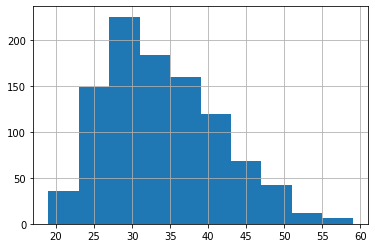

In [114]:
boston.Age.hist()

It looks like most runners are clustered aroung the 20s through mid-30s, but there is a fairly long tail to the right (that is, the data is skewed to the right).